In [1]:
%matplotlib inline
from os.path import dirname, join
import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map

import nimare

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


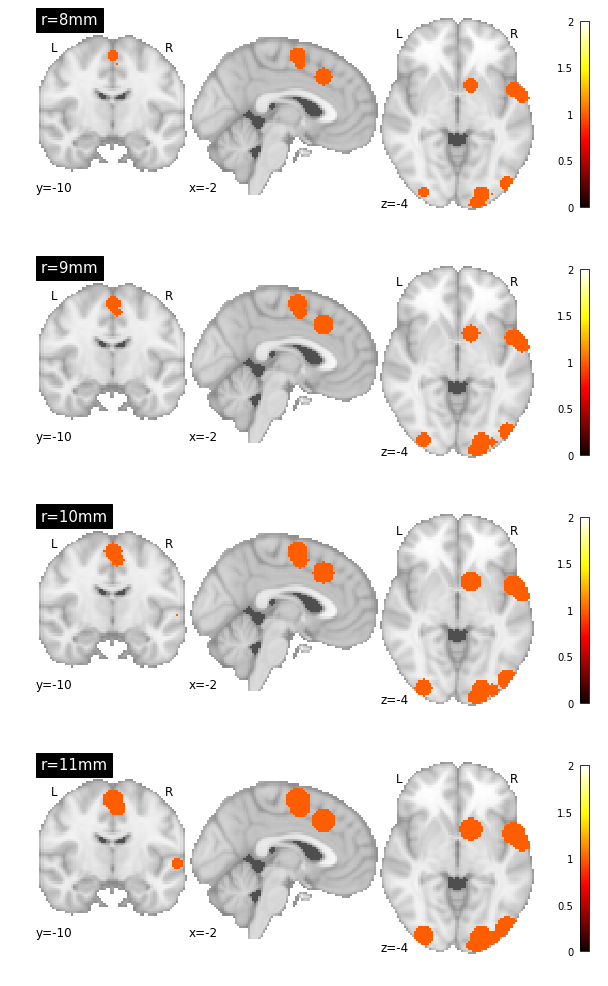

In [2]:
database_file = join(dirname(nimare.__file__), 'tests/data/nidm_pain_dset.json')
ds = nimare.dataset.Dataset(database_file)

kernel = nimare.meta.cbma.MKDAKernel(ds.coordinates, ds.mask)
mkda_r08 = kernel.transform(ids=ds.ids, r=8)
mkda_r09 = kernel.transform(ids=ds.ids, r=9)
mkda_r10 = kernel.transform(ids=ds.ids, r=10)
mkda_r11 = kernel.transform(ids=ds.ids, r=11)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 17.5))
plot_stat_map(mkda_r08[2], cut_coords=[-2, -10, -4],
              title='r=8mm', vmax=2, axes=axes[0],
              draw_cross=False)
plot_stat_map(mkda_r09[2], cut_coords=[-2, -10, -4],
              title='r=9mm', vmax=2, axes=axes[1],
              draw_cross=False)
plot_stat_map(mkda_r10[2], cut_coords=[-2, -10, -4],
              title='r=10mm', vmax=2, axes=axes[2],
              draw_cross=False)
plot_stat_map(mkda_r11[2], cut_coords=[-2, -10, -4],
              title='r=11mm', vmax=2, axes=axes[3],
              draw_cross=False)
fig.show()

In [3]:
%%time
kernel = nimare.meta.cbma.MKDAKernel(ds.coordinates, ds.mask)
mkda_res = kernel.transform(ids=ds.ids, r=10)

CPU times: user 242 ms, sys: 46.1 ms, total: 288 ms
Wall time: 305 ms


In [4]:
%%time
kernel = nimare.meta.cbma.KDAKernel(ds.coordinates, ds.mask)
kda_res = kernel.transform(ids=ds.ids, r=10)

CPU times: user 236 ms, sys: 46.9 ms, total: 283 ms
Wall time: 289 ms


In [5]:
%%time
kernel = nimare.meta.cbma.ALEKernel(ds.coordinates, ds.mask)
ale_res = kernel.transform(ids=ds.ids, n=20)

CPU times: user 168 ms, sys: 56.2 ms, total: 224 ms
Wall time: 233 ms


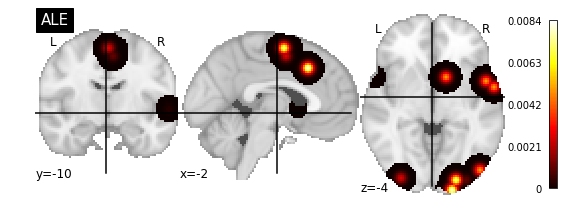

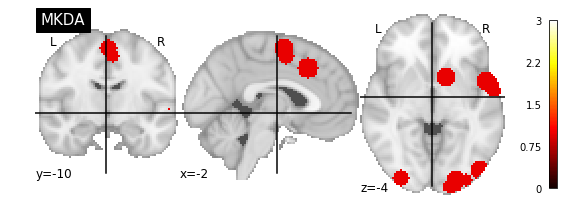

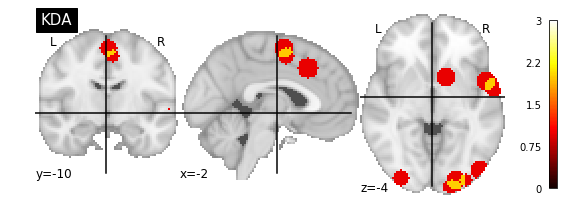

In [6]:
max_conv = np.max(kda_res[2].get_data())
plot_stat_map(ale_res[2], cut_coords=[-2, -10, -4], title='ALE')
plot_stat_map(mkda_res[2], cut_coords=[-2, -10, -4], title='MKDA', vmax=max_conv)
plot_stat_map(kda_res[2], cut_coords=[-2, -10, -4], title='KDA', vmax=max_conv)